In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
# 한글 폰트 설정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Gulim.ttc"  
font_prop = font_manager.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())


In [3]:
#pip install missingno

In [4]:
#pip install fancyimpute

In [4]:
import missingno as msno

from fancyimpute import IterativeImputer

import seaborn.objects as so

import warnings
warnings.filterwarnings('ignore')

# 최종데이터 셋

- 법정동데이터ver2.csv : 2024.04.13 기준 데이터셋
- 서울시_법정동별_데이터 버스정류장의 법정동코드, 법정동명, 시군구명 추가.

In [5]:
df = pd.read_csv("법정동데이터ver2.csv", encoding='utf-8')
df

,field_1,버스정류장수,자전거도로길이,자전거도로수,지하철역수,공원율,사고 다발 횟수,도로길이,도로수,평균경사도,추정교통량,안정성지수평균,직장인구,생활인구,자전거이용량
0,0,8,0.000000,0,0,70.440000,0.0,7853.606094,51,27.666667,908.2,0.539394,121155.06,9522.102855,16882
1,1,0,0.000000,0,0,70.440000,0.0,2301.024680,32,9.666667,908.2,0.000000,121155.06,9522.102855,0
2,2,0,0.000000,0,0,70.440000,0.0,983.529811,16,1.666667,908.2,0.000000,121155.06,9522.102855,0
3,3,2,0.000000,0,0,70.440000,0.0,1838.011626,33,1.000000,908.2,0.000000,121155.06,9522.102855,24012
4,4,1,290.058108,5,0,70.440000,0.0,2002.683230,34,0.666667,908.2,0.068966,121155.06,9522.102855,32494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,38,4346.004937,70,3,26.838865,1.0,24467.166394,139,5.000000,45593.0,0.592944,779687.10,148463.938618,295388
463,463,31,12519.684343,176,1,0.485109,0.0,51934.430103,294,2.333333,69951.0,0.690722,1007425.00,284264.087262,287342
464,464,58,9863.521859,260,3,0.961399,2.0,55904.105084,427,0.333333,40420.0,0.804035,2662003.50,383571.724752,1236036
465,465,53,10721.035411,215,1,1.357922,0.0,72835.676449,544,2.333333,31903.0,0.708297,1023030.50,537960.366348,719840


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   field_1   467 non-null    int64  
 1   버스정류장수    467 non-null    int64  
 2   자전거도로길이   467 non-null    float64
 3   자전거도로수    467 non-null    int64  
 4   지하철역수     467 non-null    int64  
 5   공원율       467 non-null    float64
 6   사고 다발 횟수  467 non-null    float64
 7   도로길이      467 non-null    float64
 8   도로수       467 non-null    int64  
 9   평균경사도     467 non-null    float64
 10  추정교통량     467 non-null    float64
 11  안정성지수평균   462 non-null    float64
 12  직장인구      467 non-null    float64
 13  생활인구      467 non-null    float64
 14  자전거이용량    467 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 54.9 KB


----
## 변수설명
법정동 별 각 변수의 수
- 법정동코드
- 법정동명
- 시군구명
- 버스정류장 수
- 자전거도로 길이
- 자전거도로 수
- 지하철역 수
- 사고 다발 지역 개수
- 도로길이
- 도로수
- 평균경사도
- 추정교통량
- 안정성지수 평균
- 직장인구
- 생활인구
- 자전거 이용량

In [7]:
df.info()
# 15개의 변수, 467개의 행
# 모두 수치형 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   field_1   467 non-null    int64  
 1   버스정류장수    467 non-null    int64  
 2   자전거도로길이   467 non-null    float64
 3   자전거도로수    467 non-null    int64  
 4   지하철역수     467 non-null    int64  
 5   공원율       467 non-null    float64
 6   사고 다발 횟수  467 non-null    float64
 7   도로길이      467 non-null    float64
 8   도로수       467 non-null    int64  
 9   평균경사도     467 non-null    float64
 10  추정교통량     467 non-null    float64
 11  안정성지수평균   462 non-null    float64
 12  직장인구      467 non-null    float64
 13  생활인구      467 non-null    float64
 14  자전거이용량    467 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 54.9 KB


<Axes: >

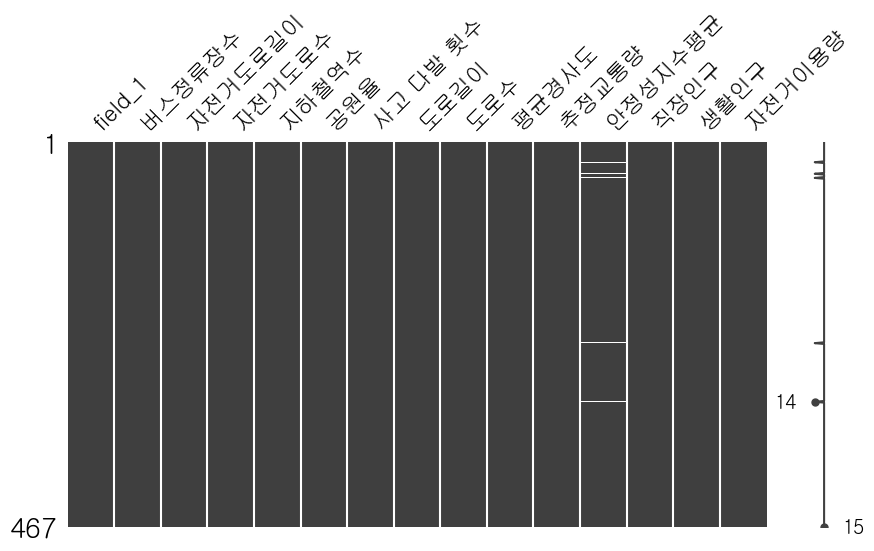

In [8]:
msno.matrix(df, figsize=(10,5))
# 안정성지수평균에 결측값 존재

In [9]:
df['안정성지수평균'] = df['안정성지수평균'].fillna(0)

---
## 2. 변수간 상관관계

In [10]:
df.corr()

,field_1,버스정류장수,자전거도로길이,자전거도로수,지하철역수,공원율,사고 다발 횟수,도로길이,도로수,평균경사도,추정교통량,안정성지수평균,직장인구,생활인구,자전거이용량
field_1,1.000000,0.440971,0.418453,0.404978,0.386513,-0.184451,0.248293,0.425061,0.286799,0.073962,0.425361,0.548145,0.318072,0.467856,0.345661
버스정류장수,0.440971,1.000000,0.576168,0.622176,0.614086,0.090352,0.431034,0.936222,0.843579,0.171707,0.823130,0.184896,0.403440,0.889462,0.612185
자전거도로길이,0.418453,0.576168,1.000000,0.948528,0.533592,0.110880,0.421753,0.560681,0.362514,0.074462,0.650394,0.190682,0.448188,0.660119,0.671705
자전거도로수,0.404978,0.622176,0.948528,1.000000,0.519403,0.114297,0.466602,0.624728,0.458373,0.103207,0.668023,0.161913,0.400040,0.702136,0.658414
지하철역수,0.386513,0.614086,0.533592,0.519403,1.000000,0.014742,0.361772,0.623843,0.506995,0.031140,0.599322,0.168771,0.554254,0.676740,0.532477
공원율,-0.184451,0.090352,0.110880,0.114297,0.014742,1.000000,0.095059,0.083607,0.088662,0.158589,0.060653,-0.155832,-0.023437,0.042446,0.043987
사고 다발 횟수,0.248293,0.431034,0.421753,0.466602,0.361772,0.095059,1.000000,0.503192,0.482856,0.025843,0.459860,0.179893,0.136375,0.483346,0.470890
도로길이,0.425061,0.936222,0.560681,0.624728,0.623843,0.083607,0.503192,1.000000,0.939048,0.170533,0.861550,0.175628,0.393493,0.904506,0.580760
도로수,0.286799,0.843579,0.362514,0.458373,0.506995,0.088662,0.482856,0.939048,1.000000,0.167938,0.749291,0.118279,0.207416,0.781478,0.424134
평균경사도,0.073962,0.171707,0.074462,0.103207,0.031140,0.158589,0.025843,0.170533,0.167938,1.000000,0.131940,0.020816,0.015983,0.133048,-0.019756


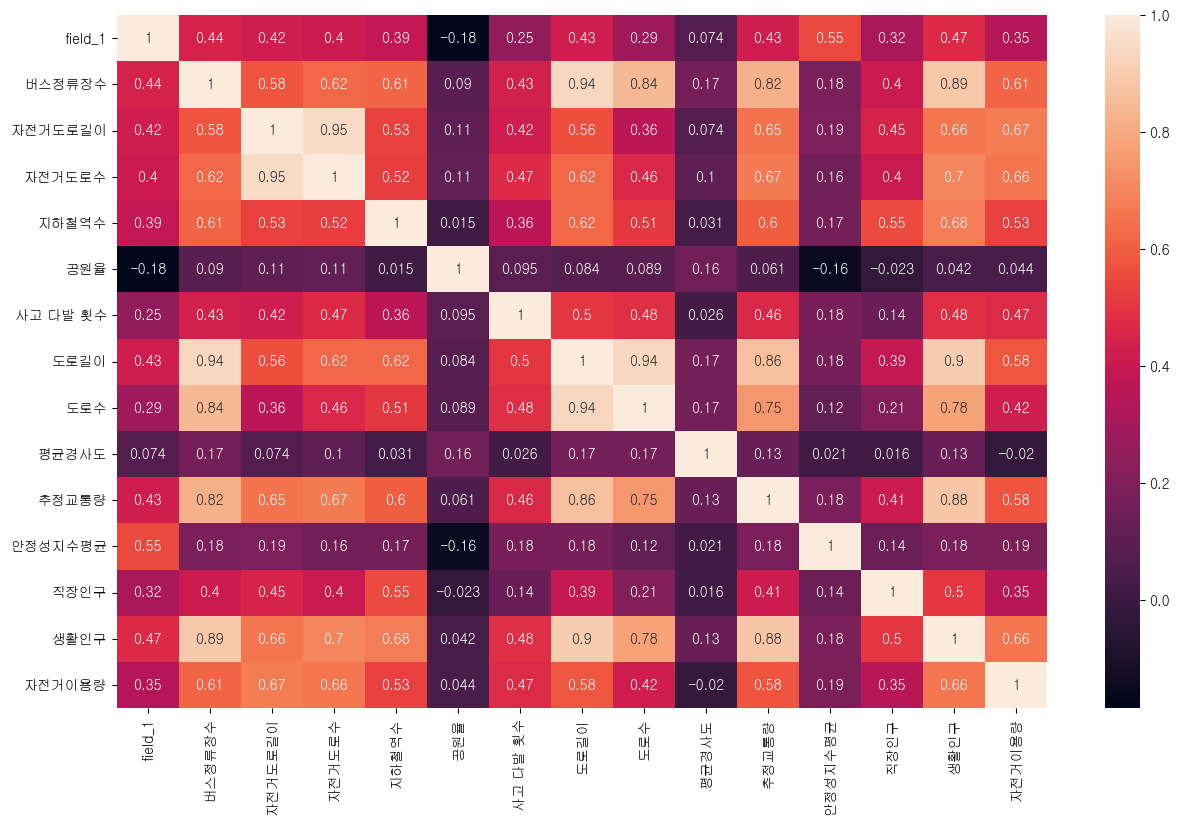

In [11]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

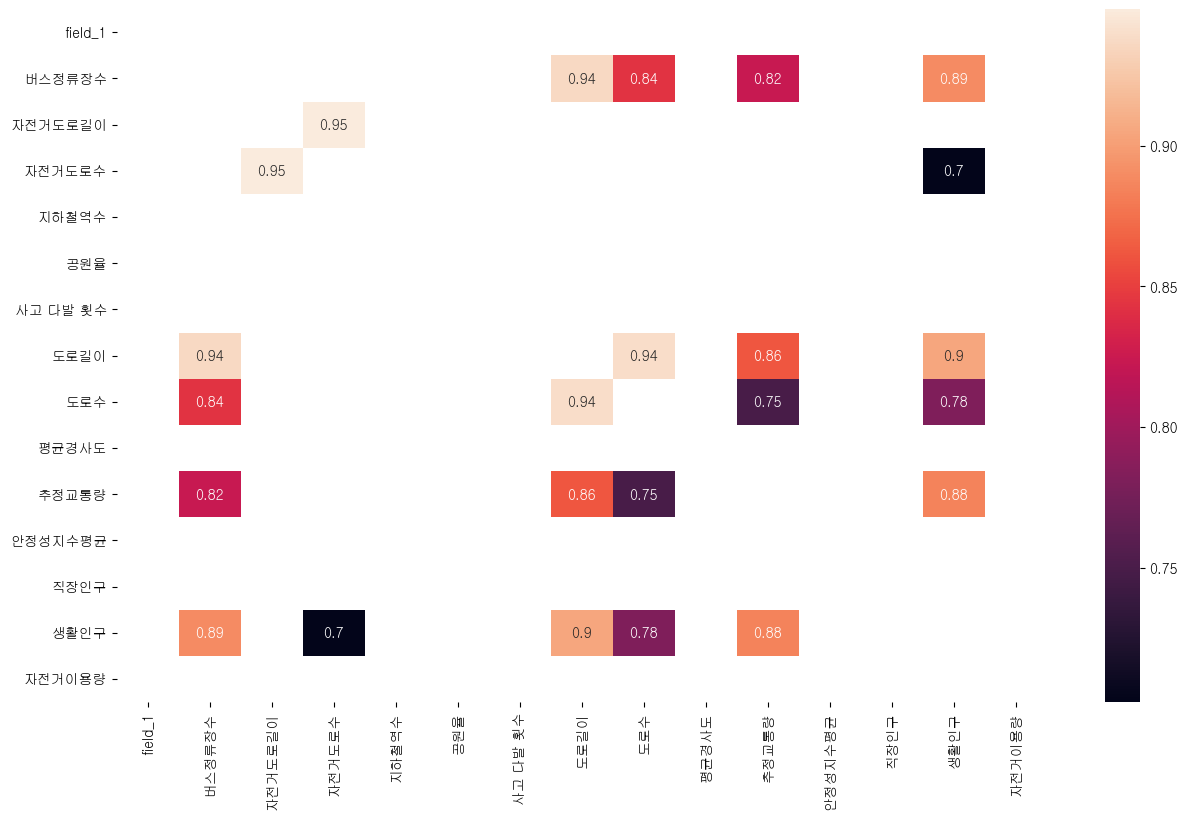

In [12]:
# 0.7이상의 상관관계
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr()[(abs(df.corr())>=0.7)&(abs(df.corr())<1)], annot=True)
plt.show()

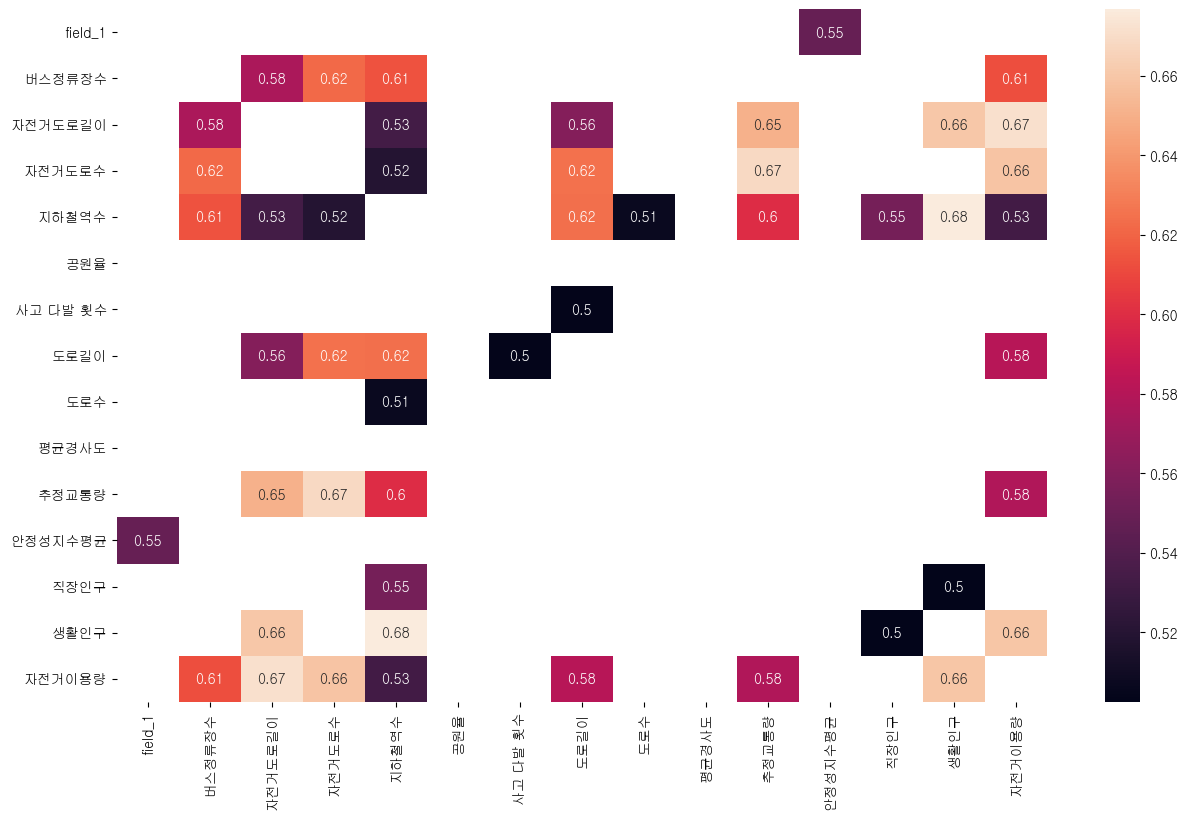

In [13]:
# 0.7이하, 0.5이상의 상관관계
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr()[(abs(df.corr())>=0.5) & (abs(df.corr())<0.7)], annot=True)
plt.show()

---
## 분석에 사용할 변수 후보 (df2)

In [14]:
df2 = df.copy()

In [15]:
df2.drop(['field_1','자전거도로길이','자전거도로수','도로길이','도로수','안정성지수평균','자전거이용량'],axis=1,inplace=True)
df2

,버스정류장수,지하철역수,공원율,사고 다발 횟수,평균경사도,추정교통량,직장인구,생활인구
0,8,0,70.440000,0.0,27.666667,908.2,121155.06,9522.102855
1,0,0,70.440000,0.0,9.666667,908.2,121155.06,9522.102855
2,0,0,70.440000,0.0,1.666667,908.2,121155.06,9522.102855
3,2,0,70.440000,0.0,1.000000,908.2,121155.06,9522.102855
4,1,0,70.440000,0.0,0.666667,908.2,121155.06,9522.102855
...,...,...,...,...,...,...,...,...
462,38,3,26.838865,1.0,5.000000,45593.0,779687.10,148463.938618
463,31,1,0.485109,0.0,2.333333,69951.0,1007425.00,284264.087262
464,58,3,0.961399,2.0,0.333333,40420.0,2662003.50,383571.724752
465,53,1,1.357922,0.0,2.333333,31903.0,1023030.50,537960.366348


In [16]:
df2.isna().sum()

버스정류장수      0
지하철역수       0
공원율         0
사고 다발 횟수    0
평균경사도       0
추정교통량       0
직장인구        0
생활인구        0
dtype: int64

## 3. Scaling
feature의 값들이 표준정규분포가 되도록 평균이 0 표준편차가 1이 되도록 변환
- MinMax Scaling
- Robust Scaling

### 3.3 Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df2_ss = ss.fit_transform(df2)
df2_ss = pd.DataFrame(df2_ss, columns=df2.columns)

print(df2_ss)

       버스정류장수     지하철역수       공원율  사고 다발 횟수     평균경사도     추정교통량      직장인구  \
0   -0.445536 -0.608703  2.998095 -0.333404  4.561580 -0.570452 -0.349042   
1   -0.667177 -0.608703  2.998095 -0.333404  0.931032 -0.570452 -0.349042   
2   -0.667177 -0.608703  2.998095 -0.333404 -0.682545 -0.570452 -0.349042   
3   -0.611767 -0.608703  2.998095 -0.333404 -0.817010 -0.570452 -0.349042   
4   -0.639472 -0.608703  2.998095 -0.333404 -0.884242 -0.570452 -0.349042   
..        ...       ...       ...       ...       ...       ...       ...   
462  0.385617  1.512671  0.795794  1.520163 -0.010222  1.452991 -0.131258   
463  0.191681  0.098422 -0.535340 -0.333404 -0.548081  2.555984 -0.055943   
464  0.939720  1.512671 -0.511282  3.373730 -0.951475  1.218744  0.491244   
465  0.801194  0.098422 -0.491254 -0.333404 -0.548081  0.833072 -0.050782   
466  0.745784  0.805547 -0.271429  1.520163 -0.144686  0.600093 -0.304386   

         생활인구  
0   -0.588088  
1   -0.588088  
2   -0.588088  
3   -0.5880

In [18]:
pd.DataFrame(df2_ss)

,버스정류장수,지하철역수,공원율,사고 다발 횟수,평균경사도,추정교통량,직장인구,생활인구
0,-0.445536,-0.608703,2.998095,-0.333404,4.561580,-0.570452,-0.349042,-0.588088
1,-0.667177,-0.608703,2.998095,-0.333404,0.931032,-0.570452,-0.349042,-0.588088
2,-0.667177,-0.608703,2.998095,-0.333404,-0.682545,-0.570452,-0.349042,-0.588088
3,-0.611767,-0.608703,2.998095,-0.333404,-0.817010,-0.570452,-0.349042,-0.588088
4,-0.639472,-0.608703,2.998095,-0.333404,-0.884242,-0.570452,-0.349042,-0.588088
...,...,...,...,...,...,...,...,...
462,0.385617,1.512671,0.795794,1.520163,-0.010222,1.452991,-0.131258,0.204739
463,0.191681,0.098422,-0.535340,-0.333404,-0.548081,2.555984,-0.055943,0.979640
464,0.939720,1.512671,-0.511282,3.373730,-0.951475,1.218744,0.491244,1.546308
465,0.801194,0.098422,-0.491254,-0.333404,-0.548081,0.833072,-0.050782,2.427279


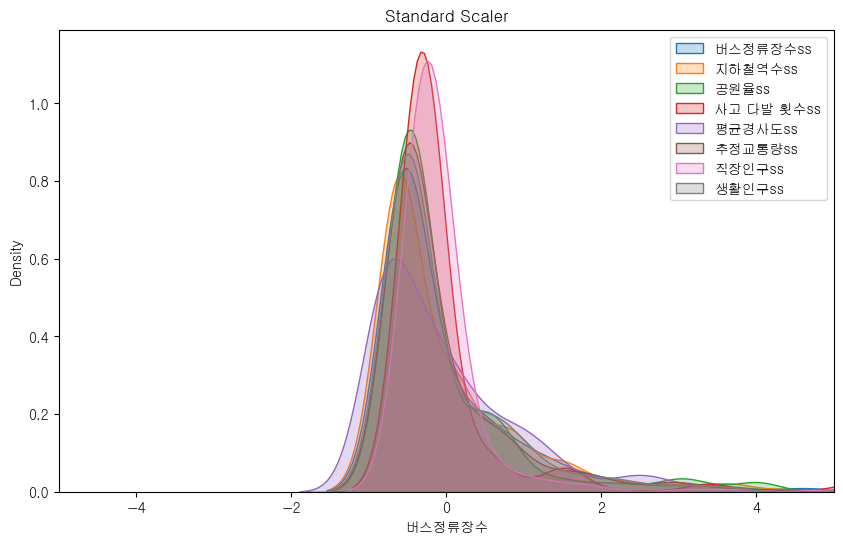

In [19]:
plt.figure(figsize=(10,6))
for i in list(df2.columns):
    sns.kdeplot(df2_ss[i], label=i+'ss',shade=True)
    plt.title(f'{i}')
    plt.xlim(-5,5)
    plt.legend()
plt.title('Standard Scaler')
plt.show()

In [20]:
df2_ss.isna().sum()

버스정류장수      0
지하철역수       0
공원율         0
사고 다발 횟수    0
평균경사도       0
추정교통량       0
직장인구        0
생활인구        0
dtype: int64

## 4. FA 요인분석

- Factor Analysis 
    - 고유값 (Eigenvalues)
    - 요인적재량 (Factor Loadings)
        - 각 변수와 잠재 요인과의 관계를 보여주는 행렬
        - 관측된 변수와 요인에 대한 상관 계수가 표시 > 각 요인과 변수들과의 관련성
    - 공통성 (Communalities) : 각 변수의 적재량 제곱의 합, 공통분산
    - 
- Bartlett 검정
    - 요인분석 모형의 적합성 여부
    - (H0: 상관관계 행렬이 단위행렬, 즉 변수가 관련되지 않음을 의미)인 가설에 대한 검정으로 파악
    - 귀무가설 기각일때만 요인분석 모델 사용가능
    - 즉, p-value가 요인분석 모형으로서의 적합도 파악의 기준.
  
- KMO 검정 
    - Kaiser-Meyer-Olkin 표본 타당성 측도
    - 기본 요인으로 인해 발생할 수 있는 변수의 분산 비율
    - 변수들 간의 상관관계가 다른 변수에 의해 잘 설명되는 정도
    - 0.5미만: 받아들일 수 없는 수치 / 0.9이상: 굉장히 좋은 수치 / 0.6-0.79: 평범
- 공통성 Communality
    - 추출된 요인들에 의해 설명되는 비율
    - 공통성이 낮은 변순는 요인변수에서 제외하는 것이 좋음(0.4이하)
- 총분산 해석
    - 요인이 설명하는 분산의 양.
    - 총분산이 큰 요인이 상대적으로 중요한 요인인 것.

#### Bartlett 검정

In [21]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df2_ss)

print(p_value )
# 요인분석 모형에 적합

0.0


#### KMO 검정

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_per_variable, kmo_total = calculate_kmo(df2_ss)

kmo_variable = pd.DataFrame(kmo_per_variable.reshape(1, -1), columns=df2.columns)
print(kmo_variable.round(3))
print('---------------------------------------')
print(f'KMO: {kmo_total}')

   버스정류장수  지하철역수    공원율  사고 다발 횟수  평균경사도  추정교통량   직장인구   생활인구
0    0.85  0.902  0.524     0.903  0.701  0.872  0.799  0.772
---------------------------------------
KMO: 0.8367741031504802


In [23]:
#pip install FactorAnalyzer

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement FactorAnalyzer (from versions: none)
ERROR: No matching distribution found for FactorAnalyzer


#### Scree Plot

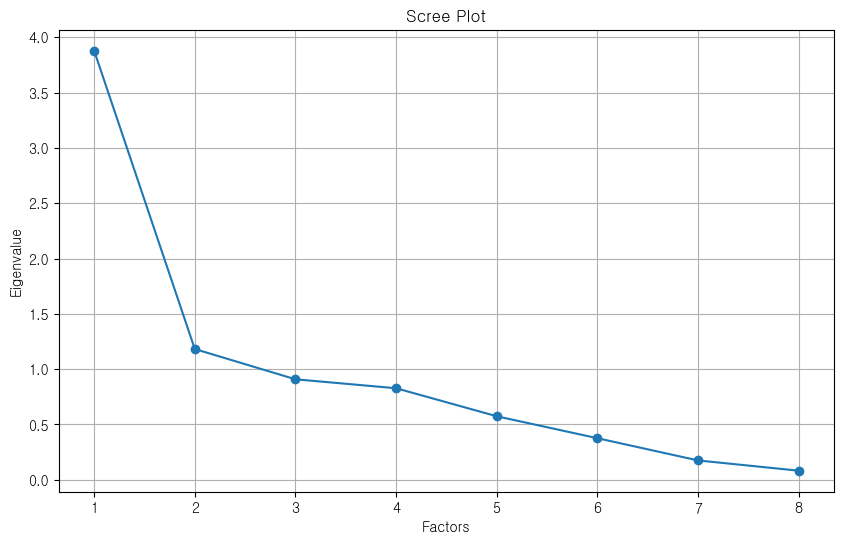

In [24]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(df2_ss)

# Scree plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, df2_ss.shape[1] + 1), fa.get_eigenvalues()[0], marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

#### 요인분석 FA

In [25]:
from factor_analyzer import FactorAnalyzer

# 요인 분석 객체 생성
fa = FactorAnalyzer(n_factors=3, rotation=None)  # 요인 개수를 설정합니다. 여기서는 10개로 설정했습니다.
# 데이터에 요인 분석 적합
fa.fit(df2_ss)

# 결과 출력
print("Eigenvalues:", fa.get_eigenvalues())  # 고유값(eigenvalues) 출력
print("Communalities:", fa.get_communalities())  # 공통성(communalities) 출력
print("Factor loadings:\n", pd.DataFrame(fa.loadings_.round(2), index=df2_ss.columns))  # 요인적재량(factor loadings) 출력

Eigenvalues: (array([3.87925163, 1.18148407, 0.90786019, 0.82699777, 0.57363231,
       0.37519008, 0.1741521 , 0.08143184]), array([ 3.66750417,  1.03261229,  0.72869736,  0.07503019,  0.02052105,
        0.00376358, -0.01177199, -0.0886319 ]))
Communalities: [0.81974756 0.54234879 0.03309741 0.26902436 0.99508217 0.81563254
 0.99611802 0.95667391]
Factor loadings:
              0     1     2
버스정류장수    0.89  0.07 -0.17
지하철역수     0.72 -0.12  0.09
공원율       0.07  0.16 -0.04
사고 다발 횟수  0.47  0.01 -0.21
평균경사도     0.17  0.95  0.26
추정교통량     0.88  0.03 -0.19
직장인구      0.62 -0.29  0.72
생활인구      0.97  0.00 -0.14


- 0: 버스정류장수, 지하철역수, 추정교통량, 생활인구, 자전거 이용량 (사고다발횟수, 직장인구) >> 접근성? 인구특성?
- 1: non

In [26]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=2, rotation=None) 
fa.fit(df2_ss)

print("Eigenvalues:", fa.get_eigenvalues())
print("Communalities:", fa.get_communalities())
print("Factor loadings:\n", pd.DataFrame(fa.loadings_.round(2), index=df2_ss.columns))

Eigenvalues: (array([3.87925163, 1.18148407, 0.90786019, 0.82699777, 0.57363231,
       0.37519008, 0.1741521 , 0.08143184]), array([ 3.63039818e+00,  4.58504342e-01,  1.53605481e-01,  8.96654143e-02,
       -3.96415960e-04, -9.60086471e-03, -7.77200578e-02, -1.55554647e-01]))
Communalities: [0.83201992 0.63570234 0.04052345 0.25321862 0.05194983 0.81335501
 0.51053296 0.95159931]
Factor loadings:
              0     1
버스정류장수    0.90  0.18
지하철역수     0.74 -0.29
공원율       0.07  0.19
사고 다발 횟수  0.48  0.16
평균경사도     0.13  0.19
추정교통량     0.89  0.15
직장인구      0.54 -0.47
생활인구      0.97  0.07


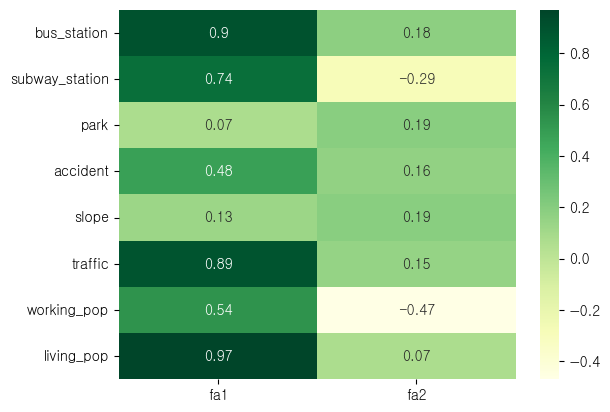

In [27]:
fa_loading=pd.DataFrame(np.round(fa.loadings_,2),columns=['fa1', 'fa2'],
                         index=['bus_station', 'subway_station', 'park', 'accident', 'slope', 'traffic', 
                                'working_pop', 'living_pop'])
fa_loading
ax = sns.heatmap(fa_loading, annot=True, cmap='YlGn')
plt.show()

In [28]:
fa2 = fa_loading
fa2

,fa1,fa2
bus_station,0.90,0.18
subway_station,0.74,-0.29
park,0.07,0.19
accident,0.48,0.16
slope,0.13,0.19
traffic,0.89,0.15
working_pop,0.54,-0.47
living_pop,0.97,0.07


In [29]:
fa2['weight'] = (fa2['fa1']+fa2['fa2'])/2
fa2

,fa1,fa2,weight
bus_station,0.90,0.18,0.540
subway_station,0.74,-0.29,0.225
park,0.07,0.19,0.130
accident,0.48,0.16,0.320
slope,0.13,0.19,0.160
traffic,0.89,0.15,0.520
working_pop,0.54,-0.47,0.035
living_pop,0.97,0.07,0.520


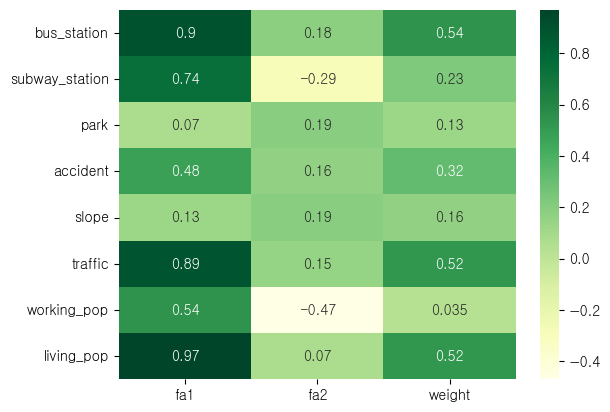

In [33]:

ax = sns.heatmap(fa2, annot=True, cmap='YlGn')
plt.show()

In [34]:
df2_ss

,버스정류장수,지하철역수,공원율,사고 다발 횟수,평균경사도,추정교통량,직장인구,생활인구
0,-0.445536,-0.608703,2.998095,-0.333404,4.561580,-0.570452,-0.349042,-0.588088
1,-0.667177,-0.608703,2.998095,-0.333404,0.931032,-0.570452,-0.349042,-0.588088
2,-0.667177,-0.608703,2.998095,-0.333404,-0.682545,-0.570452,-0.349042,-0.588088
3,-0.611767,-0.608703,2.998095,-0.333404,-0.817010,-0.570452,-0.349042,-0.588088
4,-0.639472,-0.608703,2.998095,-0.333404,-0.884242,-0.570452,-0.349042,-0.588088
...,...,...,...,...,...,...,...,...
462,0.385617,1.512671,0.795794,1.520163,-0.010222,1.452991,-0.131258,0.204739
463,0.191681,0.098422,-0.535340,-0.333404,-0.548081,2.555984,-0.055943,0.979640
464,0.939720,1.512671,-0.511282,3.373730,-0.951475,1.218744,0.491244,1.546308
465,0.801194,0.098422,-0.491254,-0.333404,-0.548081,0.833072,-0.050782,2.427279


In [59]:
df2_ss.rename(columns={'버스정류장수':'bus_station', '지하철역수':'subway_station', '공원율':'park', '사고 다발 횟수':'accident', 
                    '평균경사도':'slope', '추정교통량':'traffic', '직장인구':'working_pop', '생활인구':'living_pop'}, inplace=True)


In [60]:
df2_ss

,bus_station,subway_station,park,accident,slope,traffic,working_pop,living_pop
0,-0.445536,-0.608703,2.998095,-0.333404,4.561580,-0.570452,-0.349042,-0.588088
1,-0.667177,-0.608703,2.998095,-0.333404,0.931032,-0.570452,-0.349042,-0.588088
2,-0.667177,-0.608703,2.998095,-0.333404,-0.682545,-0.570452,-0.349042,-0.588088
3,-0.611767,-0.608703,2.998095,-0.333404,-0.817010,-0.570452,-0.349042,-0.588088
4,-0.639472,-0.608703,2.998095,-0.333404,-0.884242,-0.570452,-0.349042,-0.588088
...,...,...,...,...,...,...,...,...
462,0.385617,1.512671,0.795794,1.520163,-0.010222,1.452991,-0.131258,0.204739
463,0.191681,0.098422,-0.535340,-0.333404,-0.548081,2.555984,-0.055943,0.979640
464,0.939720,1.512671,-0.511282,3.373730,-0.951475,1.218744,0.491244,1.546308
465,0.801194,0.098422,-0.491254,-0.333404,-0.548081,0.833072,-0.050782,2.427279


In [61]:
df2_total = np.dot(df2_ss, fa2['weight'])
df2_total

array([ 2.07106822e-02, -6.79863087e-01, -9.38035387e-01, -9.29628222e-01,
       -9.55346163e-01, -1.22648030e+00, -1.09729878e+00, -8.84745937e-01,
       -4.39001562e-01, -8.50124385e-01, -7.98110669e-02, -1.10159773e+00,
       -9.98229522e-01, -1.19655878e+00, -9.23922160e-01, -1.25640182e+00,
       -1.26715900e+00, -1.25640182e+00, -5.06381779e-01, -1.17504442e+00,
       -8.99561341e-01, -1.28620269e+00, -1.24552399e+00, -1.25393115e+00,
       -1.24972757e+00, -1.05649942e+00, -1.25628116e+00, -1.23897039e+00,
       -1.15761298e+00, -9.13504671e-01, -1.18518449e+00, -1.20064170e+00,
       -1.26468833e+00, -1.03498507e+00, -1.21560246e+00, -1.22400963e+00,
       -1.26048475e+00, -1.17072018e+00, -7.52433815e-01, -3.76428989e-01,
       -7.76298187e-01, -8.21180472e-01, -7.56637397e-01, -7.99666114e-01,
       -7.24365860e-01, -1.06028313e+00, -1.31375540e+00, -1.17626209e+00,
       -1.11357258e+00, -1.14635936e+00, -1.11213889e+00, -1.24317397e+00,
       -1.10558529e+00, -

In [62]:
df2_total = pd.DataFrame(df2_total)
df2_total

,0
0,0.020711
1,-0.679863
2,-0.938035
3,-0.929628
4,-0.955346
...,...
462,1.994280
463,1.698243
464,3.163711
465,1.890150


In [63]:
df2_total.rename(columns={0:'weight'}, inplace=True)
df2_total

,weight
0,0.020711
1,-0.679863
2,-0.938035
3,-0.929628
4,-0.955346
...,...
462,1.994280
463,1.698243
464,3.163711
465,1.890150


In [64]:
location = pd.read_csv('서울시_법정동별_서울전체도로.csv', encoding='cp949')
location

,field_1,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,SeoulRoadLength,SeoulRoadCount
0,0,11110101,Cheongun-dong,청운동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,7853.606094,51
1,1,11110102,Singyo-dong,신교동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,2301.024680,32
2,2,11110103,Gungjeong-dong,궁정동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,983.529811,16
3,3,11110104,Hyoja-dong,효자동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,1838.011626,33
4,4,11110105,Changseong-dong,창성동,11110,Jongno-gu,종로구,11,Seoul,서울특별시,2002.683230,34
...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,11740106,Dunchon-dong,둔촌동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,24467.166394,139
463,463,11740107,Amsa-dong,암사동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,51934.430103,294
464,464,11740108,Seongnae-dong,성내동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,55904.105084,427
465,465,11740109,Cheonho-dong,천호동,11740,Gangdong-gu,강동구,11,Seoul,서울특별시,72835.676449,544


In [65]:
loc = location[['field_1', 'EMD_KOR_NM']]
loc

,field_1,EMD_KOR_NM
0,0,청운동
1,1,신교동
2,2,궁정동
3,3,효자동
4,4,창성동
...,...,...
462,462,둔촌동
463,463,암사동
464,464,성내동
465,465,천호동


In [66]:
df2_total

,weight
0,0.020711
1,-0.679863
2,-0.938035
3,-0.929628
4,-0.955346
...,...
462,1.994280
463,1.698243
464,3.163711
465,1.890150


In [67]:
df2_total.reset_index(inplace=True)
df2_total

,index,weight
0,0,0.020711
1,1,-0.679863
2,2,-0.938035
3,3,-0.929628
4,4,-0.955346
...,...,...
462,462,1.994280
463,463,1.698243
464,464,3.163711
465,465,1.890150


In [68]:
loc.rename(columns={'field_1' : 'index'}, inplace = True)
loc

,index,EMD_KOR_NM
0,0,청운동
1,1,신교동
2,2,궁정동
3,3,효자동
4,4,창성동
...,...,...
462,462,둔촌동
463,463,암사동
464,464,성내동
465,465,천호동


In [69]:
merged_df2_total_loc = pd.merge(loc, df2_total, on='index', how='inner')
merged_df2_total_loc

,index,EMD_KOR_NM,weight
0,0,청운동,0.020711
1,1,신교동,-0.679863
2,2,궁정동,-0.938035
3,3,효자동,-0.929628
4,4,창성동,-0.955346
...,...,...,...
462,462,둔촌동,1.994280
463,463,암사동,1.698243
464,464,성내동,3.163711
465,465,천호동,1.890150


In [70]:
# PC123_sum 열을 기준으로 내림차순으로 정렬
df2_total_sorted = merged_df2_total_loc.sort_values(by='weight', ascending=False)
df2_total_sorted = pd.DataFrame(df2_total_sorted)

# 결과 출력
print(df2_total_sorted)

     index EMD_KOR_NM     weight
419    419        신림동  11.761638
287    287        상계동  11.342500
418    418        봉천동   9.835039
351    351        화곡동   9.659403
231    231        면목동   8.367946
..     ...        ...        ...
94      94        수하동  -1.430619
112    112       명동1가  -1.441376
87      87        무교동  -1.441376
95      95        장교동  -1.452133
88      88         다동  -1.462890

[467 rows x 3 columns]


In [71]:
df2_total_sorted.to_csv('FA 로딩값끼리의 평균에 따른 행정동 내림차순.csv', encoding='cp949')

In [72]:
df2_total_sorted

,index,EMD_KOR_NM,weight
419,419,신림동,11.761638
287,287,상계동,11.342500
418,418,봉천동,9.835039
351,351,화곡동,9.659403
231,231,면목동,8.367946
...,...,...,...
94,94,수하동,-1.430619
112,112,명동1가,-1.441376
87,87,무교동,-1.441376
95,95,장교동,-1.452133


In [81]:
df2_total_sorted.rename(columns={'weight' : 'total_score'}, inplace = True)
df2_total_sorted

,index,EMD_KOR_NM,total_score
419,419,신림동,11.761638
287,287,상계동,11.342500
418,418,봉천동,9.835039
351,351,화곡동,9.659403
231,231,면목동,8.367946
...,...,...,...
94,94,수하동,-1.430619
112,112,명동1가,-1.441376
87,87,무교동,-1.441376
95,95,장교동,-1.452133


In [86]:
df2_total_sorted[df2_total_sorted['total']]

,index,EMD_KOR_NM,total_score
419,419,신림동,11.761638
287,287,상계동,11.342500
418,418,봉천동,9.835039
351,351,화곡동,9.659403
231,231,면목동,8.367946
...,...,...,...
320,320,아현동,0.028252
356,356,공항동,0.024290
0,0,청운동,0.020711
349,349,염창동,0.016936


In [87]:
df_tc = pd.read_csv('totalclustering.csv', encoding='cp949')
df_tc

,field_1,EMD_KOR_NM,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,hierarchical,kmedoids,kmeans,total
0,0,청운동,8,0.000000,27.666667,1.306772e+05,908.2,0.539394,16882,0,1,2,No
1,1,신교동,0,0.000000,9.666667,1.306772e+05,908.2,0.000000,0,0,3,1,No
2,2,궁정동,0,0.000000,1.666667,1.306772e+05,908.2,0.000000,0,0,3,1,No
3,3,효자동,2,0.000000,1.000000,1.306772e+05,908.2,0.000000,24012,0,3,1,No
4,4,창성동,1,0.144835,0.666667,1.306772e+05,908.2,0.068966,32494,0,3,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,둔촌동,41,0.177626,5.000000,9.281510e+05,45593.0,0.592944,295388,0,1,2,No
463,463,암사동,32,0.241067,2.333333,1.291689e+06,69951.0,0.690722,287342,1,0,2,No
464,464,성내동,61,0.176436,0.333333,3.045575e+06,40420.0,0.804035,1236036,1,0,2,No
465,465,천호동,54,0.147195,2.333333,1.560991e+06,31903.0,0.708297,719840,0,1,2,No


In [88]:
df_tc1 = df_tc[df_tc['total'] == 'Yes']
df_tc1

,field_1,EMD_KOR_NM,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,hierarchical,kmedoids,kmeans,total
28,28,견지동,5,0.000000,2.000000,4.247247e+05,481.793103,2.500000,36776,3,2,0,Yes
105,105,봉래동1가,3,0.000000,2.000000,1.582549e+06,2721.533333,1.500000,0,3,2,0,Yes
108,108,회현동2가,3,0.000000,2.666667,1.078991e+06,2182.939130,1.407407,16308,3,2,0,Yes
122,122,묵정동,1,0.000000,4.000000,6.281533e+05,7106.696970,1.676471,0,3,2,0,Yes
156,156,충정로1가,1,0.000000,2.333333,9.097890e+05,1177.333333,2.400000,26954,3,2,0,Yes
176,176,청암동,4,0.194250,9.333333,1.225416e+05,4690.400000,2.600000,25150,3,2,0,Yes
178,178,원효로4가,8,0.142417,9.000000,1.225416e+05,4690.400000,1.389241,71738,3,2,0,Yes
200,200,도선동,5,0.000000,1.333333,2.097402e+05,2311.750000,2.170213,0,3,2,0,Yes
201,201,마장동,29,0.093166,8.666667,8.506893e+05,16131.000000,1.532895,270106,3,2,0,Yes
202,202,사근동,26,0.150519,9.666667,2.149149e+05,8206.000000,1.974359,77564,3,2,0,Yes


In [89]:
df2_total_sorted

,index,EMD_KOR_NM,total_score
419,419,신림동,11.761638
287,287,상계동,11.342500
418,418,봉천동,9.835039
351,351,화곡동,9.659403
231,231,면목동,8.367946
...,...,...,...
94,94,수하동,-1.430619
112,112,명동1가,-1.441376
87,87,무교동,-1.441376
95,95,장교동,-1.452133


In [90]:
df_fin = pd.merge(df_tc1,df2_total_sorted, how='inner', on='EMD_KOR_NM')
df_fin

,field_1,EMD_KOR_NM,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,hierarchical,kmedoids,kmeans,total,index,total_score
0,28,견지동,5,0.000000,2.000000,4.247247e+05,481.793103,2.500000,36776,3,2,0,Yes,28,-1.157613
1,105,봉래동1가,3,0.000000,2.000000,1.582549e+06,2721.533333,1.500000,0,3,2,0,Yes,105,-1.256739
2,108,회현동2가,3,0.000000,2.666667,1.078991e+06,2182.939130,1.407407,16308,3,2,0,Yes,108,-1.264472
3,122,묵정동,1,0.000000,4.000000,6.281533e+05,7106.696970,1.676471,0,3,2,0,Yes,122,-1.104910
4,156,충정로1가,1,0.000000,2.333333,9.097890e+05,1177.333333,2.400000,26954,3,2,0,Yes,156,-1.341313
5,176,청암동,4,0.194250,9.333333,1.225416e+05,4690.400000,2.600000,25150,3,2,0,Yes,176,-0.982278
6,178,원효로4가,8,0.142417,9.000000,1.225416e+05,4690.400000,1.389241,71738,3,2,0,Yes,178,-0.933192
7,200,도선동,5,0.000000,1.333333,2.097402e+05,2311.750000,2.170213,0,3,2,0,Yes,200,-1.197151
8,201,마장동,29,0.093166,8.666667,8.506893e+05,16131.000000,1.532895,270106,3,2,0,Yes,201,0.076770
9,202,사근동,26,0.150519,9.666667,2.149149e+05,8206.000000,1.974359,77564,3,2,0,Yes,202,0.049041


In [92]:
# PC123_sum 열을 기준으로 내림차순으로 정렬
df_fin_sorted = df_fin.sort_values(by='total_score', ascending=False)
df_fin_sorted = pd.DataFrame(df_fin_sorted)

# 결과 출력
print(df_fin_sorted)

    field_1 EMD_KOR_NM  대중교통  자전거도로수용율      평균경사도            인구         추정교통량  \
14      276        미아동   155  0.018065   8.666667  1.544332e+06  46737.000000   
37      415        사당동    87  0.035392   2.333333  1.927952e+06  56101.000000   
15      278        수유동   145  0.027978   2.333333  1.443264e+06  37000.000000   
10      203        행당동    72  0.022828   5.333333  7.927954e+05  27384.000000   
42      456        거여동    45  0.092333   9.000000  1.104702e+06  52477.000000   
11      211      성수동2가    52  0.116772   2.666667  4.552690e+06  29313.000000   
39      417       신대방동    44  0.128860   4.333333  3.609879e+06  28969.000000   
38      416        대방동    55  0.061172   4.333333  1.473101e+06  15640.000000   
8       201        마장동    29  0.093166   8.666667  8.506893e+05  16131.000000   
9       202        사근동    26  0.150519   9.666667  2.149149e+05   8206.000000   
16      279        우이동    19  0.000000  18.333333  1.952089e+05   2655.000000   
41      450        삼전동    14

In [93]:
df_fin_sorted.to_csv('clustering & FA 합친 결과_2.csv', encoding='cp949')

In [97]:
result = pd.read_csv('clustering & FA 합친 결과_2.csv', encoding='cp949')
result

,Unnamed: 0,field_1,EMD_KOR_NM,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,hierarchical,kmedoids,kmeans,total,index,total_score
0,14,276,미아동,155,0.018065,8.666667,1.544332e+06,46737.000000,1.737160,349886,3,2,0,Yes,276,5.429065
1,37,415,사당동,87,0.035392,2.333333,1.927952e+06,56101.000000,1.551174,332364,3,2,0,Yes,415,4.487185
2,15,278,수유동,145,0.027978,2.333333,1.443264e+06,37000.000000,1.746076,461670,3,2,0,Yes,278,4.230182
3,10,203,행당동,72,0.022828,5.333333,7.927954e+05,27384.000000,1.658660,376518,3,2,0,Yes,203,2.269082
4,42,456,거여동,45,0.092333,9.000000,1.104702e+06,52477.000000,1.593939,393924,3,2,0,Yes,456,2.264029
5,11,211,성수동2가,52,0.116772,2.666667,4.552690e+06,29313.000000,1.475904,851676,3,2,0,Yes,211,2.205849
6,39,417,신대방동,44,0.128860,4.333333,3.609879e+06,28969.000000,1.700344,520870,3,2,0,Yes,417,1.806112
7,38,416,대방동,55,0.061172,4.333333,1.473101e+06,15640.000000,1.538182,269854,3,2,0,Yes,416,0.949450
8,8,201,마장동,29,0.093166,8.666667,8.506893e+05,16131.000000,1.532895,270106,3,2,0,Yes,201,0.076770
9,9,202,사근동,26,0.150519,9.666667,2.149149e+05,8206.000000,1.974359,77564,3,2,0,Yes,202,0.049041


In [99]:
result[result['total_score']>=0].drop(['Unnamed: 0', 'field_1'], axis=1)

,EMD_KOR_NM,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,hierarchical,kmedoids,kmeans,total,index,total_score
0,미아동,155,0.018065,8.666667,1.544332e+06,46737.0,1.737160,349886,3,2,0,Yes,276,5.429065
1,사당동,87,0.035392,2.333333,1.927952e+06,56101.0,1.551174,332364,3,2,0,Yes,415,4.487185
2,수유동,145,0.027978,2.333333,1.443264e+06,37000.0,1.746076,461670,3,2,0,Yes,278,4.230182
3,행당동,72,0.022828,5.333333,7.927954e+05,27384.0,1.658660,376518,3,2,0,Yes,203,2.269082
4,거여동,45,0.092333,9.000000,1.104702e+06,52477.0,1.593939,393924,3,2,0,Yes,456,2.264029
5,성수동2가,52,0.116772,2.666667,4.552690e+06,29313.0,1.475904,851676,3,2,0,Yes,211,2.205849
6,신대방동,44,0.128860,4.333333,3.609879e+06,28969.0,1.700344,520870,3,2,0,Yes,417,1.806112
7,대방동,55,0.061172,4.333333,1.473101e+06,15640.0,1.538182,269854,3,2,0,Yes,416,0.949450
8,마장동,29,0.093166,8.666667,8.506893e+05,16131.0,1.532895,270106,3,2,0,Yes,201,0.076770
9,사근동,26,0.150519,9.666667,2.149149e+05,8206.0,1.974359,77564,3,2,0,Yes,202,0.049041


In [80]:
ver2 = df_fin_sorted['EMD_KOR_NM'].tolist()
ver2

['미아동',
 '사당동',
 '수유동',
 '행당동',
 '거여동',
 '성수동2가',
 '신대방동',
 '대방동',
 '마장동',
 '사근동',
 '우이동',
 '삼전동',
 '증산동',
 '대현동',
 '영등포동',
 '온수동',
 '영천동',
 '도림동',
 '자곡동',
 '궁동',
 '당산동3가',
 '양평동1가',
 '원효로4가',
 '청암동',
 '영등포동7가',
 '양평동5가',
 '양평동6가',
 '묵정동',
 '영등포동8가',
 '영등포동4가',
 '합동',
 '영등포동2가',
 '오곡동',
 '영등포동3가',
 '견지동',
 '도선동',
 '영등포동6가',
 '미근동',
 '봉래동1가',
 '회현동2가',
 '충정로1가',
 '동소문동3가',
 '동소문동2가']

In [82]:
ver1 = pd.read_csv('clustering & FA 합친 결과_1.csv', encoding='cp949')

In [95]:
ver1_emd = ver1['EMD_KOR_NM'].tolist()

In [96]:
ver1_emd

['미아동',
 '사당동',
 '행당동',
 '수유동',
 '거여동',
 '신대방동',
 '우이동',
 '성수동2가',
 '대방동',
 '영천동',
 '마장동',
 '증산동',
 '사근동',
 '온수동',
 '삼전동',
 '영등포동',
 '대현동',
 '궁동',
 '원효로4가',
 '자곡동',
 '청암동',
 '도림동',
 '양평동6가',
 '합동',
 '묵정동',
 '양평동5가',
 '당산동3가',
 '영등포동7가',
 '봉래동1가',
 '회현동2가',
 '미근동',
 '충정로1가',
 '양평동1가',
 '영등포동2가',
 '도선동',
 '영등포동4가',
 '견지동',
 '영등포동8가',
 '영등포동3가',
 '영등포동6가',
 '오곡동',
 '동소문동3가',
 '동소문동2가']

In [94]:
ver2

['미아동',
 '사당동',
 '수유동',
 '행당동',
 '거여동',
 '성수동2가',
 '신대방동',
 '대방동',
 '마장동',
 '사근동',
 '우이동',
 '삼전동',
 '증산동',
 '대현동',
 '영등포동',
 '온수동',
 '영천동',
 '도림동',
 '자곡동',
 '궁동',
 '당산동3가',
 '양평동1가',
 '원효로4가',
 '청암동',
 '영등포동7가',
 '양평동5가',
 '양평동6가',
 '묵정동',
 '영등포동8가',
 '영등포동4가',
 '합동',
 '영등포동2가',
 '오곡동',
 '영등포동3가',
 '견지동',
 '도선동',
 '영등포동6가',
 '미근동',
 '봉래동1가',
 '회현동2가',
 '충정로1가',
 '동소문동3가',
 '동소문동2가']

In [97]:
len(ver1_emd)

43

In [89]:
len(ver2)

43

In [98]:
if ver1_emd == ver2:
    print("두 리스트는 같습니다.")
else:
    print("두 리스트는 다릅니다.")

두 리스트는 다릅니다.


In [99]:
def print_different_elements(list1, list2):
    # 두 리스트를 집합(set)으로 변환하여 요소의 순서를 무시하고 중복을 제거함
    set1 = set(list1)
    set2 = set(list2)
    
    # 두 집합의 차집합을 구하여 다른 요소를 찾음
    diff1 = set1 - set2
    diff2 = set2 - set1
    
    # 두 리스트의 차이를 출력
    if diff1:
        print("list1에만 있는 요소:", diff1)
    if diff2:
        print("list2에만 있는 요소:", diff2)
    
    # 두 리스트가 같은 경우
    if not diff1 and not diff2:
        print("두 리스트는 같습니다.")

# 서로 다른 부분 출력
print_different_elements(ver1_emd, ver2)


두 리스트는 같습니다.
